In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests

In [3]:
fusarium = pd.read_csv('../data/fusarium_matrix.tsv', sep='\t', index_col=0)

In [4]:
fusarium

,F200_vs_F282,F200_vs_F287,F200_vs_F324,F200_vs_F329,F200_vs_F365,F200_vs_F418,F200_vs_F456,F200_vs_F476,F200_vs_F482,F200_vs_F483,...,FO_reference_vs_F287,FO_reference_vs_F324,FO_reference_vs_F329,FO_reference_vs_F365,FO_reference_vs_F418,FO_reference_vs_F456,FO_reference_vs_F476,FO_reference_vs_F482,FO_reference_vs_F483,FO_reference_vs_F525
F39_001036,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
F39_006286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
F39_005546,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
F39_011583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F39_004154,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F39_005157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F39_012769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F39_012550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F39_010462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


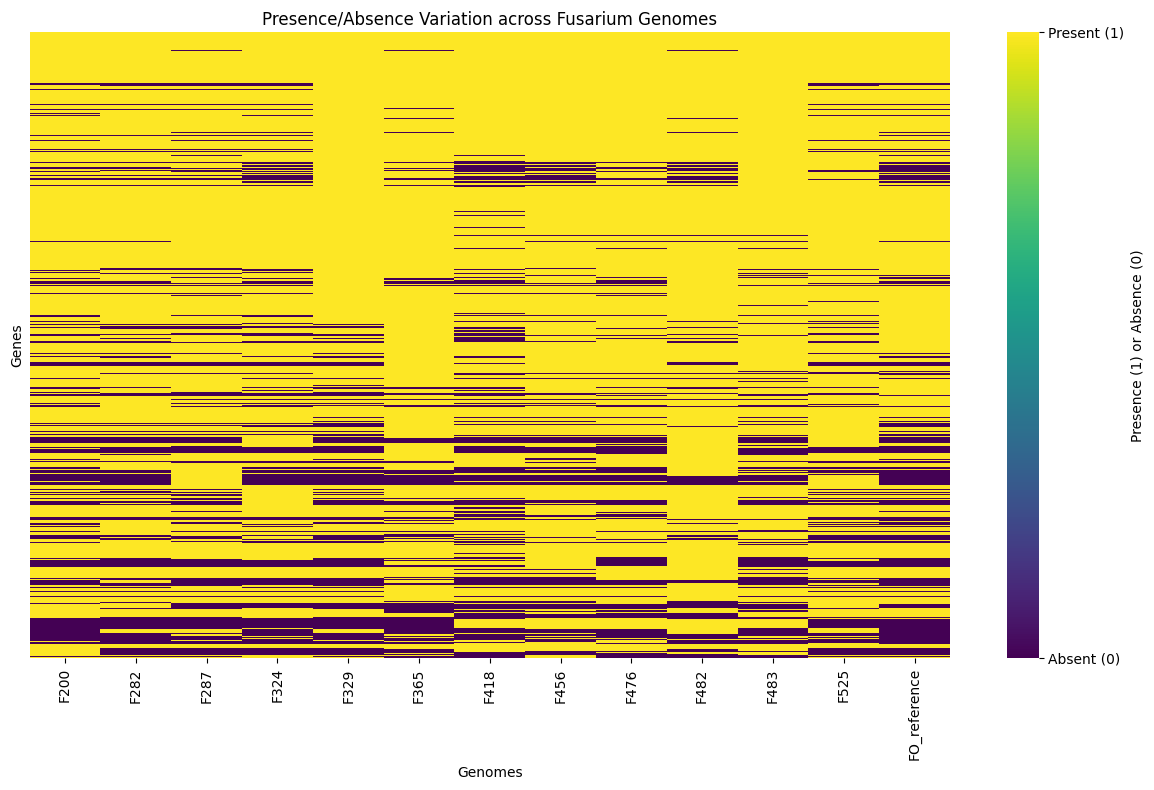

In [5]:
genomes = ['F200', 'F282', 'F287', 'F324', 'F329', 'F365', 'F418', 'F456', 'F476', 'F482', 'F483', 'F525', 'FO_reference']

gene_presence = pd.DataFrame(0, index=fusarium.index, columns=genomes)

for column in fusarium.columns:
    
    genome_pair = column.split("_vs_")  
    
    for genome in genome_pair:
        gene_presence[genome] |= fusarium[column]  
        
plt.figure(figsize=(12, 8))
ax = sns.heatmap(gene_presence, cmap="viridis", cbar_kws={'label': 'Presence (1) or Absence (0)'}, 
                 xticklabels=True, yticklabels=False)

plt.xlabel("Genomes")
plt.ylabel("Genes")
plt.title("Presence/Absence Variation across Fusarium Genomes")
plt.tight_layout()

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Absent (0)', 'Present (1)'])

plt.show()

## Search for the most variable genes

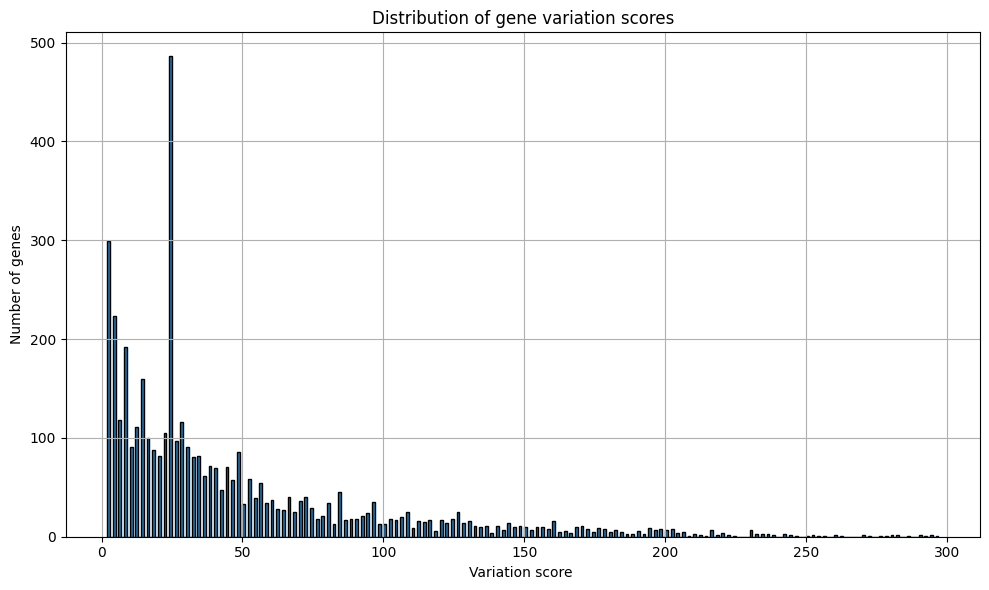

In [9]:
fusarium['score'] = fusarium.sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(
    fusarium['score'],
    bins=range(fusarium['score'].min(), fusarium['score'].max() + 2),
    edgecolor='black'
)
plt.title('Distribution of gene variation scores')
plt.xlabel('Variation score ') 
plt.ylabel('Number of genes')
plt.grid(True)
plt.tight_layout()
plt.show()

Number of genes in top 5%: 233
Number of genes in top 3%: 134
Number of genes in top 1%: 48


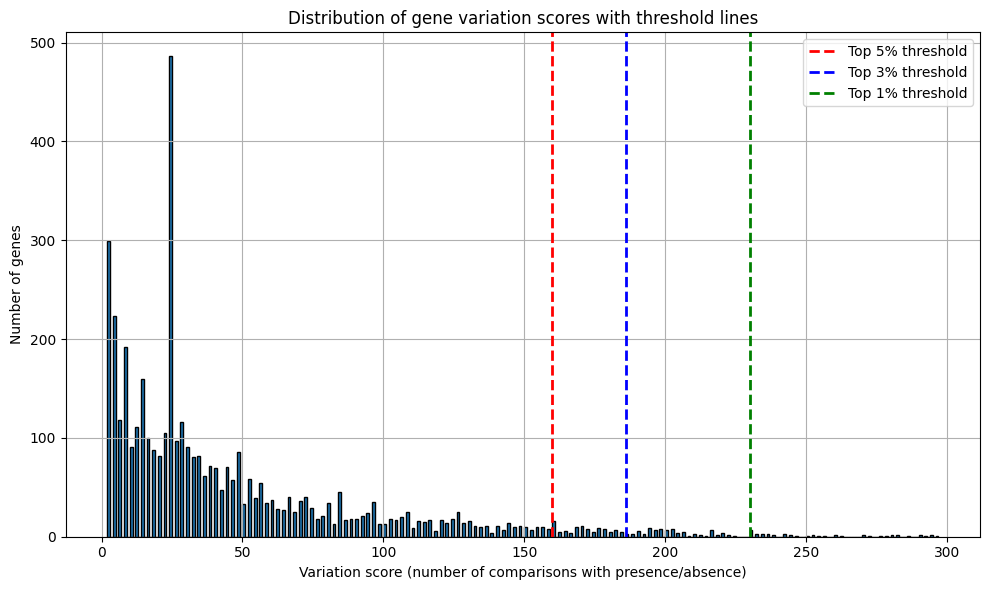

In [10]:
top_5_threshold = fusarium['score'].quantile(0.95)
top_3_threshold = fusarium['score'].quantile(0.97)
top_1_threshold = fusarium['score'].quantile(0.99)

top_5_genes = fusarium[fusarium['score'] >= top_5_threshold]
top_3_genes = fusarium[fusarium['score'] >= top_3_threshold]
top_1_genes = fusarium[fusarium['score'] >= top_1_threshold]

print(f"Number of genes in top 5%: {top_5_genes.shape[0]}")
print(f"Number of genes in top 3%: {top_3_genes.shape[0]}")
print(f"Number of genes in top 1%: {top_1_genes.shape[0]}")

plt.figure(figsize=(10, 6))
plt.hist(
    fusarium['score'],
    bins=range(fusarium['score'].min(), fusarium['score'].max() + 2),
    edgecolor='black'
)

# Plot vertical lines for each top sample
plt.axvline(top_5_threshold, color='red', linestyle='dashed', linewidth=2, label='Top 5% threshold')
plt.axvline(top_3_threshold, color='blue', linestyle='dashed', linewidth=2, label='Top 3% threshold')
plt.axvline(top_1_threshold, color='green', linestyle='dashed', linewidth=2, label='Top 1% threshold')

# Add labels and title
plt.title('Distribution of gene variation scores with threshold lines')
plt.xlabel('Variation score (number of comparisons with presence/absence)')
plt.ylabel('Number of genes')

# Add legend
plt.legend()

# Show grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
top_5_genes_list = top_5_genes.index

top_5_genes_df = pd.DataFrame(top_5_genes_list, columns=['Gene'])

print(top_5_genes_df)

#top_5_genes_df.to_csv('./data/top_5_genes_list.csv', index=False)

           Gene
0    F39_005546
1    F39_009127
2    F39_008282
3    F39_012074
4    F39_008260
..          ...
228  F39_004056
229  F39_007299
230  F39_010714
231  F39_009257
232  F39_011243

[233 rows x 1 columns]


## GO analysis

In [ ]:
# Загружаем файлы
gene_list = pd.read_csv("../data/top_5_genes_fusarium.csv", header=None, names=["gene"])
bed = pd.read_csv("../references/F39.peptide.bed", sep="\t", header=None, names=["chr", "start", "end", "gene"])
interpro = pd.read_csv("../references/F39_old_assembly.interpro.tsv", sep="\t", header=None, usecols=[0, 11], names=["region", "GO_terms"])

# Преобразуем координаты в формат region_key
bed["region_key"] = bed["chr"] + ":" + bed["start"].astype(str) + "-" + bed["end"].astype(str)

# Соединяем ген и аннтоацию
interpro_genes = pd.merge(interpro, bed, left_on="region", right_on="region_key", how="inner")

# Делаем красивое
interpro_genes = interpro_genes.dropna(subset=["GO_terms"])

interpro_genes = interpro_genes.assign(
    GO_term=interpro_genes["GO_terms"].str.split("|")
).explode("GO_term")
interpro_genes["GO_term"] = interpro_genes["GO_term"].str.split("(").str[0]

all_genes = interpro_genes["gene"].unique()
input_genes = gene_list["gene"].tolist()

# Только те гены, которые есть в аннотации
input_genes_in_ann = list(set(input_genes) & set(all_genes))
genes_with_go = interpro_genes[interpro_genes["gene"].isin(input_genes_in_ann)]

# Общее количество генов в аннотации
N = len(all_genes)
# Кол-во генов в выборке
n = len(input_genes_in_ann)

# Подсчёт GO-термов в выборке
go_counts = genes_with_go["GO_term"].value_counts()

results = []
for go_term in go_counts.index:
    k = go_counts[go_term]  # в выборке
    M = len(interpro_genes[interpro_genes["GO_term"] == go_term]["gene"].unique())  # в фоне

    p_value = hypergeom.sf(k - 1, N, M, n)
    results.append({
        "GO Term": go_term,
        "In List": k,
        "In Background": M,
        "P-value": p_value
    })

results_df = pd.DataFrame(results)
results_df.sort_values("P-value", inplace=True)
results_df.to_csv("./data/go_enrichment_results.tsv", sep="\t", index=False)
